## Importing and Merging the Data

In [117]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [119]:
# Importing all datasets
churn_data = pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Telecom churn Logistic R\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
customer_data = pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Telecom churn Logistic R\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [121]:
internet_data = pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Telecom churn Logistic R\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


##### Combining all data files into one consolidated dataframe

In [122]:
df1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [123]:
telecom=pd.merge(df1,internet_data,how="inner",on="customerID")

 ## Inspecting the Dataframe

In [124]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [125]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [126]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [127]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


##  Data Preparation

##### Converting some binary variables (Yes/No) to 0/1

In [128]:
# List of variables to map
varlist=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({"Yes":1,"No":0})

# Applying the function to the housing list
telecom[varlist]=telecom[varlist].apply(binary_map)

In [129]:
pd.set_option("display.max_columns",100)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [130]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [131]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [132]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis= 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [133]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [134]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [135]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [136]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

##### Checking for Outliers

In [137]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [138]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


#### From the distribution shown above,we can see that there no outliers in the data. The numbers are gradually increasing.

##### Checking for Missing Values and Inputing Them

In [139]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [140]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [141]:
# Checking for the missing values again.
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

## Test-Train Split

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# Putting feature variable to X
X=telecom.drop(["Churn","customerID"],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [144]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [145]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,train_size=0.7)

## Step 5: Feature Scaling

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
scaler=MinMaxScaler()
X_train[["tenure","MonthlyCharges","TotalCharges"]]=scaler.fit_transform(X_train[["tenure","MonthlyCharges","TotalCharges"]])

In [148]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.450704,1,1,0.362189,0.189979,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.549296,0,1,0.324378,0.232831,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0.000000,1,1,0.637313,0.007322,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,0.126761,1,1,0.913930,0.118216,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,0.042254,1,1,0.794527,0.043556,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [149]:
X_train.shape

(4922, 30)

In [150]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

## Step 6: Looking at Correlations

In [151]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

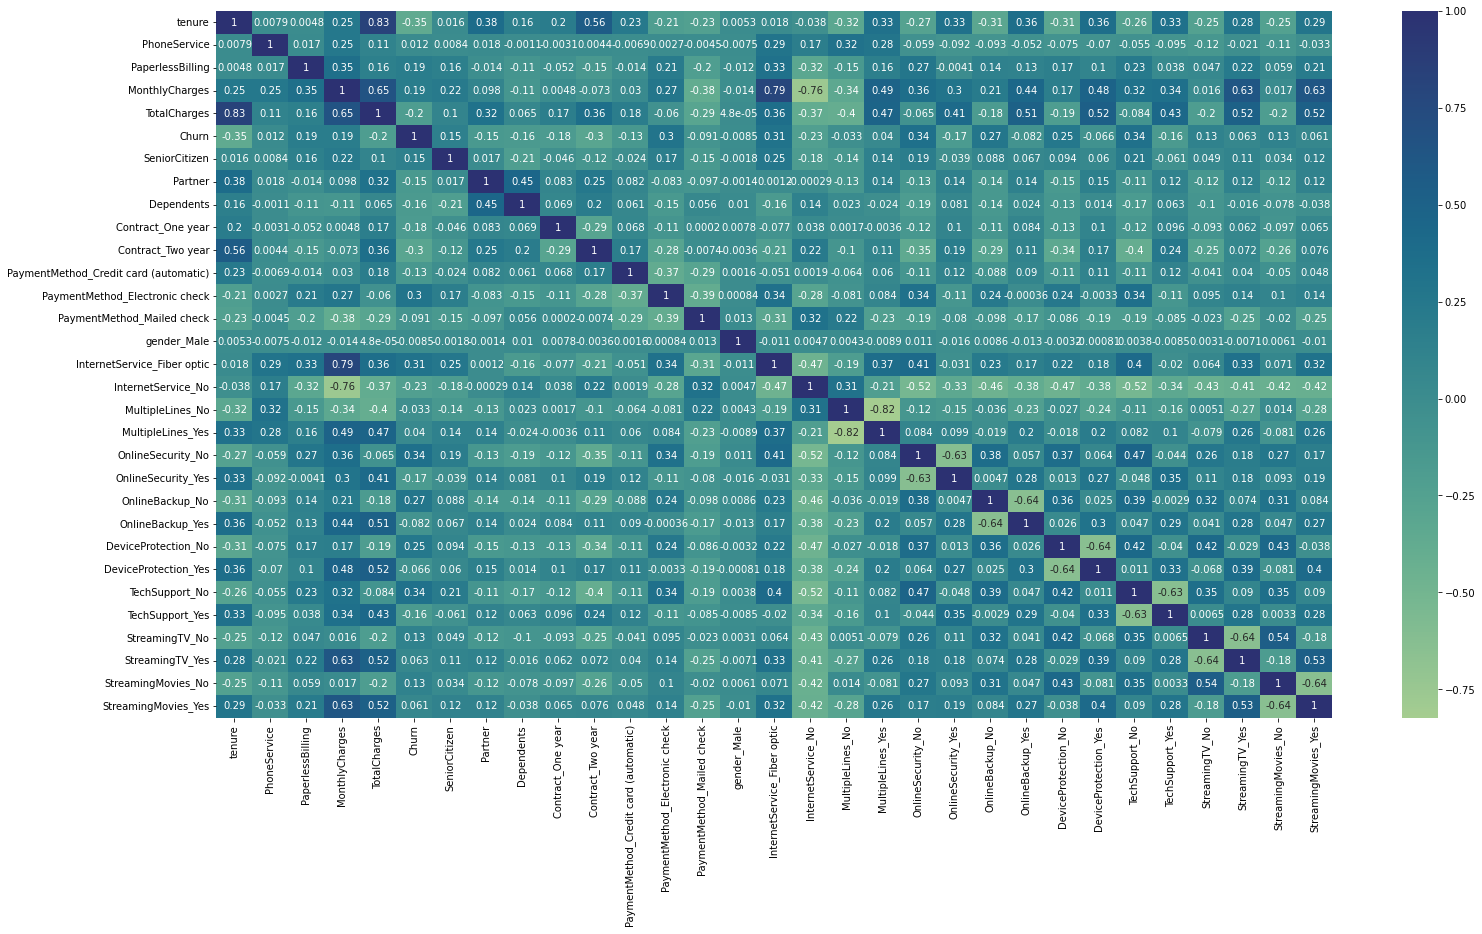

In [152]:
# Plotting the heatmap.
plt.figure(figsize=[25,13])
sns.heatmap(telecom.corr(),cmap="crest",annot=True)
plt.show()

#### Dropping highly correlated dummy variables

In [153]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

#### After dropping highly correlated variables now let's check the correlation matrix again.

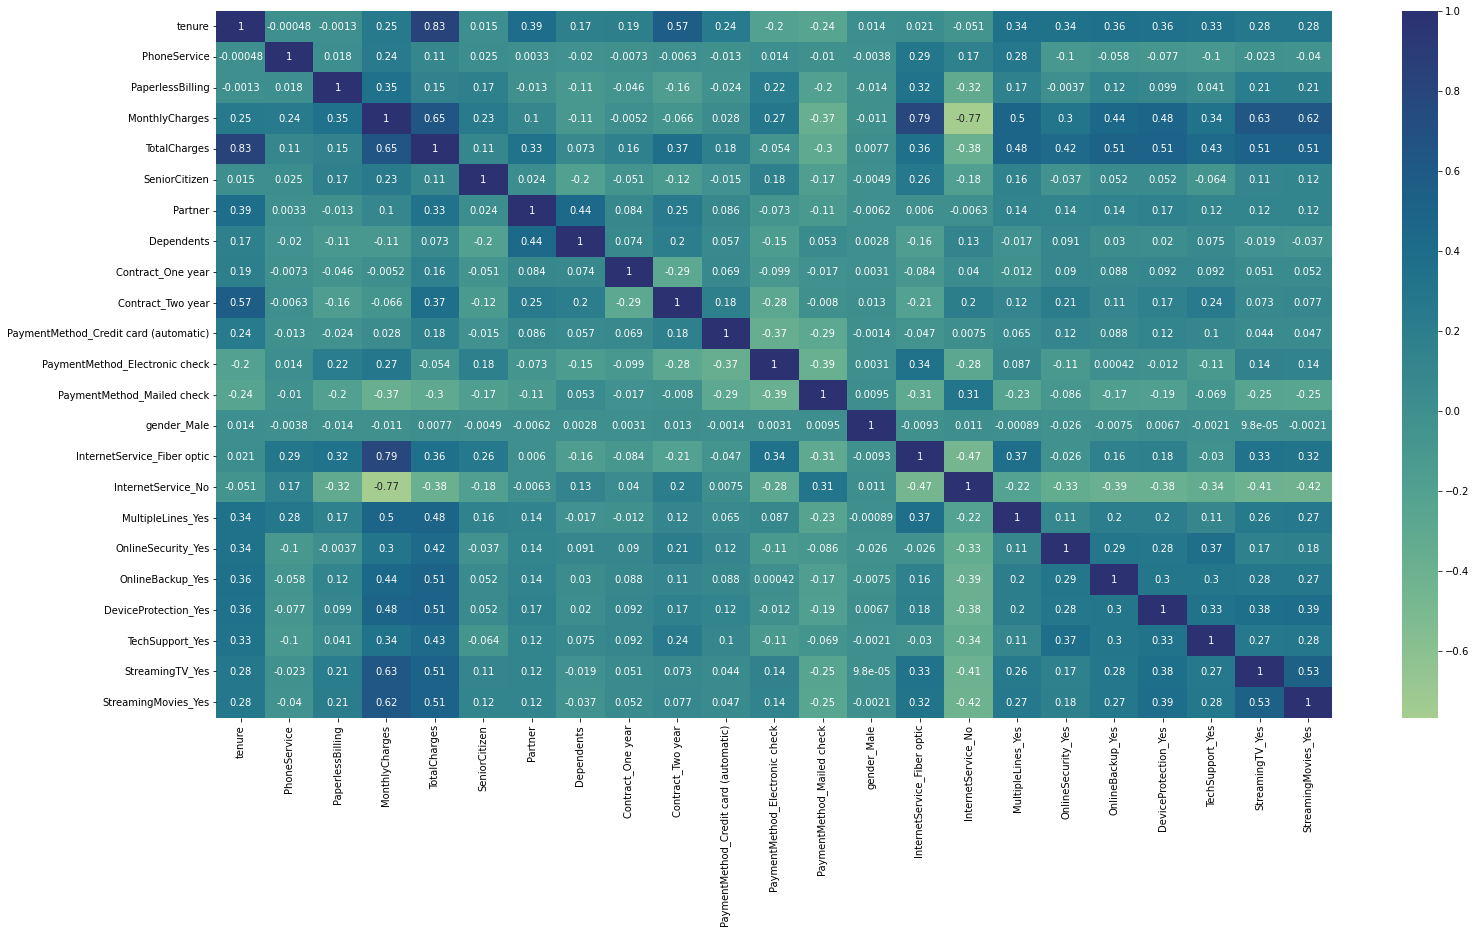

In [154]:
# Plotting the heatmap.
plt.figure(figsize=[25,13])
sns.heatmap(X_train.corr(),cmap="crest",annot=True)
plt.show()

## Step 7: Model Building

In [155]:
import statsmodels.api as sm

In [156]:
X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 31 Aug 2023   Deviance:                       4009.4
Time:                        18:09:23   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6551      0.337      1.945      0.052      -0.005       1.315
tenure                                   -4.3963      0.549     -8.015      0.000      -5.471      -3.321
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -7.2877      3.876     -1.880      0.060     -14.884       0.309
TotalCharges                              2.8018      0.756      3.705      0.000       1.320       4.284
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## Step 8: Feature Selection Using RFE

In [157]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [158]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [159]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False])

In [160]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3)]

In [161]:
col=X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [162]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Thu, 31 Aug 2023   Deviance:                       4023.5
Time:                        18:09:24   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2823
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2316      0.172      1.350      0.177      -0.105       0.568
tenure                                   -4.4585      0.532     -8.381      0.000      -5.501      -3.416
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              2.7191      0.717      3.794      0.000       1.315       4.124
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

In [163]:
# Getting the predicted values on the train set
y_train_pred=logm2.fit().predict(X_train_sm)
y_train_pred[:10]

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
3874    0.417544
5387    0.420131
6623    0.809427
4465    0.223211
5364    0.512246
dtype: float64

In [164]:
y_train_pred=y_train_pred.values.reshape(-1)

In [165]:
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [166]:
y_train_pred_final=pd.DataFrame({"Churn":y_train.values,"Churn_prob":y_train_pred})

In [167]:
y_train_pred_final["CustID"]=y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [168]:
y_train_pred_final["predicted"]=y_train_pred_final.Churn_prob.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [170]:
# Confusion Matrix
confusion=confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[3270  365]
 [ 579  708]]


In [171]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [172]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8082080455099553


##### Checking VIFs

In [173]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,tenure,15.54
3,TotalCharges,15.35
1,PhoneService,7.88
9,InternetService_Fiber optic,4.04
6,Contract_Two year,3.41
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.41
13,TechSupport_Yes,2.11


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Tenure' has the highest VIF. So let's start by dropping that.

In [175]:
col=col.drop("tenure",1)
col

Index(['PhoneService', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [176]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.4
Date:                Thu, 31 Aug 2023   Deviance:                       4106.9
Time:                        18:09:26   Pearson chi2:                 5.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2701
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5008      0.147     -3.410      0.001      -0.789      -0.213
PhoneService                             -0.1625      0.149     -1.087      0.277      -0.455       0.130
PaperlessBilling                          0.3112      0.089      3.512      0.000       0.138       0.485
TotalCharges                             -2.9604      0.260    -11.382      0.000      -3.470      -2.451
SeniorCitizen                             0.4134      0.099      4.168      0.000       0.219       0.608
Contract_One year                        -0.8421      0.124     -6.790      0.000      -1.085      -0.599
Contract_Two year                        -1.5683      0.202     -7.759      0.000      -1.964      -1.172
PaymentMethod_Credit card (automatic)    -0.4103      0.112     -3.673      0.000      -0.629      -0.191
PaymentMethod_Mailed check               -0.2277      0.108     -2.104      0.035      -0.440      -0.016
InternetService_Fiber optic               1.0488      0.110      9.532      0.000       0.833       1.264
InternetService_No                       -1.1734      0.164     -7.163      0.000      -1.494      -0.852
MultipleLines_Yes                         0.2305      0.094      2.456      0.014       0.047       0.414
OnlineSecurity_Yes                       -0.3741      0.101     -3.689      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3126      0.101     -3.104      0.002      -0.510      -0.115
StreamingTV_Yes                           0.4716      0.090      5.213      0.000       0.294       0.649
=========================================================================================================
"""

In [177]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [178]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [179]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.335365,879,0
1,0,0.399559,5790,0
2,1,0.662623,6498,1
3,1,0.532848,880,1
4,1,0.674082,2784,1


In [180]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8029256399837464


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,PhoneService,7.76
2,TotalCharges,6.36
8,InternetService_Fiber optic,3.84
9,InternetService_No,3.01
5,Contract_Two year,2.85
1,PaperlessBilling,2.60
10,MultipleLines_Yes,2.53
13,StreamingTV_Yes,2.37
12,TechSupport_Yes,2.11
11,OnlineSecurity_Yes,1.98


In [182]:
# Let's drop PhoneService since it has a high VIF
col = col.drop('PhoneService')
col

Index(['PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [183]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.0
Date:                Thu, 31 Aug 2023   Deviance:                       4108.0
Time:                        18:09:26   Pearson chi2:                 5.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2699
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6094      0.109     -5.616      0.000      -0.822      -0.397
PaperlessBilling                          0.3140      0.089      3.546      0.000       0.140       0.488
TotalCharges                             -2.9577      0.260    -11.373      0.000      -3.467      -2.448
SeniorCitizen                             0.4196      0.099      4.239      0.000       0.226       0.614
Contract_One year                        -0.8420      0.124     -6.787      0.000      -1.085      -0.599
Contract_Two year                        -1.5622      0.202     -7.728      0.000      -1.958      -1.166
PaymentMethod_Credit card (automatic)    -0.4093      0.112     -3.665      0.000      -0.628      -0.190
PaymentMethod_Mailed check               -0.2332      0.108     -2.157      0.031      -0.445      -0.021
InternetService_Fiber optic               0.9993      0.100     10.025      0.000       0.804       1.195
InternetService_No                       -1.2238      0.157     -7.807      0.000      -1.531      -0.917
MultipleLines_Yes                         0.2116      0.092      2.299      0.021       0.031       0.392
OnlineSecurity_Yes                       -0.3763      0.101     -3.711      0.000      -0.575      -0.178
TechSupport_Yes                          -0.3190      0.101     -3.174      0.002      -0.516      -0.122
StreamingTV_Yes                           0.4788      0.090      5.306      0.000       0.302       0.656
=========================================================================================================
"""

In [184]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [185]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [186]:
# Creating new column 'predicted' with 1 if Churn_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.343969,879,0
1,0,0.376321,5790,0
2,1,0.664234,6498,1
3,1,0.534397,880,1
4,1,0.675883,2784,1


In [187]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8019097927671678


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalCharges,6.36
7,InternetService_Fiber optic,2.88
4,Contract_Two year,2.85
9,MultipleLines_Yes,2.40
0,PaperlessBilling,2.36
12,StreamingTV_Yes,2.36
8,InternetService_No,2.07
11,TechSupport_Yes,2.04
10,OnlineSecurity_Yes,1.90
3,Contract_One year,1.86


In [189]:
# Let's drop Total Charges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [190]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2123.1
Date:                Thu, 31 Aug 2023   Deviance:                       4246.2
Time:                        18:09:27   Pearson chi2:                 5.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2491
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5716      0.106     -5.371      0.000      -0.780      -0.363
PaperlessBilling                          0.2849      0.087      3.271      0.001       0.114       0.456
SeniorCitizen                             0.3062      0.095      3.228      0.001       0.120       0.492
Contract_One year                        -1.4128      0.115    -12.301      0.000      -1.638      -1.188
Contract_Two year                        -2.4101      0.190    -12.683      0.000      -2.783      -2.038
PaymentMethod_Credit card (automatic)    -0.4887      0.109     -4.465      0.000      -0.703      -0.274
PaymentMethod_Mailed check               -0.1446      0.107     -1.352      0.176      -0.354       0.065
InternetService_Fiber optic               0.6889      0.095      7.255      0.000       0.503       0.875
InternetService_No                       -1.1519      0.156     -7.401      0.000      -1.457      -0.847
MultipleLines_Yes                        -0.1306      0.086     -1.523      0.128      -0.299       0.038
OnlineSecurity_Yes                       -0.6081      0.098     -6.230      0.000      -0.799      -0.417
TechSupport_Yes                          -0.4860      0.098     -4.983      0.000      -0.677      -0.295
StreamingTV_Yes                           0.2088      0.085      2.459      0.014       0.042       0.375
=========================================================================================================
"""

In [191]:
# Let's drop PaymentMethod_Mailed check since it has a highp value
col = col.drop('PaymentMethod_Mailed check')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [192]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2124.0
Date:                Thu, 31 Aug 2023   Deviance:                       4248.0
Time:                        18:09:28   Pearson chi2:                 5.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2488
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6295      0.098     -6.452      0.000      -0.821      -0.438
PaperlessBilling                          0.2933      0.087      3.376      0.001       0.123       0.464
SeniorCitizen                             0.3170      0.095      3.355      0.001       0.132       0.502
Contract_One year                        -1.4070      0.115    -12.258      0.000      -1.632      -1.182
Contract_Two year                        -2.4009      0.190    -12.642      0.000      -2.773      -2.029
PaymentMethod_Credit card (automatic)    -0.4585      0.107     -4.270      0.000      -0.669      -0.248
InternetService_Fiber optic               0.7097      0.094      7.570      0.000       0.526       0.893
InternetService_No                       -1.1878      0.153     -7.740      0.000      -1.489      -0.887
MultipleLines_Yes                        -0.1233      0.086     -1.440      0.150      -0.291       0.045
OnlineSecurity_Yes                       -0.6085      0.098     -6.237      0.000      -0.800      -0.417
TechSupport_Yes                          -0.4923      0.097     -5.053      0.000      -0.683      -0.301
StreamingTV_Yes                           0.2188      0.085      2.586      0.010       0.053       0.385
=========================================================================================================
"""

In [193]:
# Let's drop MultipleLines_Yes check since it has a high p value
col = col.drop('MultipleLines_Yes')
col

Index(['PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [194]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2125.0
Date:                Thu, 31 Aug 2023   Deviance:                       4250.1
Time:                        18:09:28   Pearson chi2:                 5.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2485
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6390      0.097     -6.569      0.000      -0.830      -0.448
PaperlessBilling                          0.2867      0.087      3.307      0.001       0.117       0.457
SeniorCitizen                             0.3042      0.094      3.234      0.001       0.120       0.489
Contract_One year                        -1.4179      0.115    -12.379      0.000      -1.642      -1.193
Contract_Two year                        -2.4282      0.189    -12.848      0.000      -2.799      -2.058
PaymentMethod_Credit card (automatic)    -0.4627      0.107     -4.311      0.000      -0.673      -0.252
InternetService_Fiber optic               0.6661      0.089      7.518      0.000       0.492       0.840
InternetService_No                       -1.1862      0.153     -7.732      0.000      -1.487      -0.885
OnlineSecurity_Yes                       -0.6152      0.097     -6.313      0.000      -0.806      -0.424
TechSupport_Yes                          -0.4955      0.097     -5.089      0.000      -0.686      -0.305
StreamingTV_Yes                           0.2074      0.084      2.463      0.014       0.042       0.372
=========================================================================================================
"""

In [195]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [196]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [197]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.412825,879,0
1,0,0.463842,5790,0
2,1,0.577821,6498,1
3,1,0.356765,880,0
4,1,0.506440,2784,1


In [198]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7862657456318569


The accuracy has reduced a little bit but it is considerable

##### Let's now check the VIFs again

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,PaperlessBilling,2.31
5,InternetService_Fiber optic,2.22
9,StreamingTV_Yes,2.15
3,Contract_Two year,2.08
8,TechSupport_Yes,1.92
7,OnlineSecurity_Yes,1.74
6,InternetService_No,1.61
2,Contract_One year,1.57
4,PaymentMethod_Credit card (automatic),1.34
1,SeniorCitizen,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [200]:
# Let's take a look at the confusion matrix again 
confusion =confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3188,  447],
       [ 605,  682]], dtype=int64)

In [201]:
# Predicted     not_churn    churn
# Actual
# not_churn        3188      447
# churn            605       682  

## Metrics beyond simply accuracy

In [202]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [203]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.5299145299145299

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.8770288858321871

In [205]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12297111416781294


In [206]:
# positive predictive value 
print (TP / float(TP+FP))

0.604074402125775


In [207]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8404956498813604


## Step 9: Plotting the ROC Curve

In [208]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [209]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [210]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

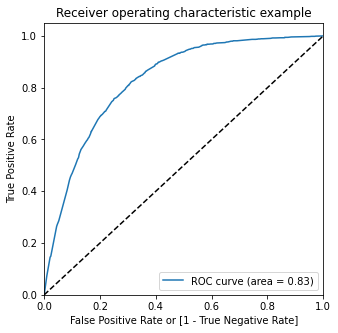

In [211]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

## Step 10: Finding Optimal Cutoff Point

In [212]:
# Let's create columns with different probability cutoffs 
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()    

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.412825,879,0,1,1,1,1,1,0,0,0,0,0
1,0,0.463842,5790,0,1,1,1,1,1,0,0,0,0,0
2,1,0.577821,6498,1,1,1,1,1,1,1,0,0,0,0
3,1,0.356765,880,0,1,1,1,1,0,0,0,0,0,0
4,1,0.506440,2784,1,1,1,1,1,1,1,0,0,0,0


In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.596912  0.951826  0.471252
0.2   0.2  0.701747  0.848485  0.649794
0.3   0.3  0.742991  0.770785  0.733150
0.4   0.4  0.772653  0.679876  0.805502
0.5   0.5  0.786266  0.529915  0.877029
0.6   0.6  0.774685  0.264180  0.955433
0.7   0.7  0.738521  0.000000  1.000000
0.8   0.8  0.738521  0.000000  1.000000
0.9   0.9  0.738521  0.000000  1.000000


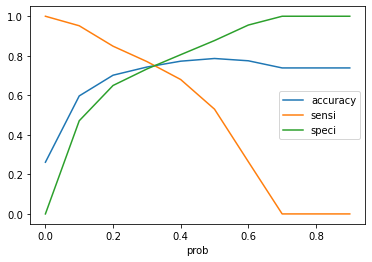

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [215]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.412825,879,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.463842,5790,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.577821,6498,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.356765,880,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.506440,2784,1,1,1,1,1,1,1,0,0,0,0,1


In [216]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7429906542056075

In [217]:
confusion2 =confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2665,  970],
       [ 295,  992]], dtype=int64)

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7707847707847708

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.7331499312242091

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2668500687757909


In [222]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5056065239551478


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9003378378378378


## Precision and Recall

In [224]:
confusion =confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3188,  447],
       [ 605,  682]], dtype=int64)

##### Precision

In [225]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.604074402125775

##### Recall

In [226]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5299145299145299

## Precision and recall tradeoff

In [227]:
from sklearn.metrics import precision_recall_curve

In [228]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

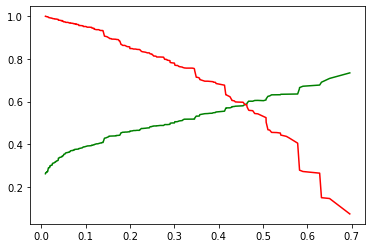

In [229]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [230]:
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,2001.00,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
3730,57,1,1,104.50,5921.35,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,1
1761,58,1,1,24.45,1513.60,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
2283,1,1,1,71.55,71.55,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
1872,41,1,0,19.70,804.25,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [231]:
X_test[["tenure","MonthlyCharges","TotalCharges"]]=scaler.transform(X_test[["tenure","MonthlyCharges","TotalCharges"]])

In [232]:
X_test = X_test[col]
X_test.head()

,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
942,1,0,0,0,1,1,0,0,0,0
3730,1,0,0,0,1,1,0,0,0,1
1761,1,0,0,1,1,0,1,0,0,0
2283,1,0,0,0,0,1,0,0,0,0
1872,0,0,0,1,0,0,1,0,0,0


In [233]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [234]:
y_test_pred = res.predict(X_test_sm)

In [235]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [236]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [237]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [238]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [239]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [240]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.462857
1,1,3730,0.514637
2,0,1761,0.011782
3,1,2283,0.577821
4,0,1872,0.014017


In [241]:
# Renaming the column 
y_pred_final=y_pred_final.rename(columns={0:"Churn_prob"})

In [243]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_prob'], axis=1)

In [244]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_prob
0,942,0,0.462857
1,3730,1,0.514637
2,1761,0,0.011782
3,2283,1,0.577821
4,1872,0,0.014017


In [245]:
y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.46 else 0) # Based on Precision Recall tradeoff

In [246]:
y_pred_final.head()

,CustID,Churn,Churn_prob,final_predicted
0,942,0,0.462857,1
1,3730,1,0.514637,1
2,1761,0,0.011782,0
3,2283,1,0.577821,1
4,1872,0,0.014017,0


In [247]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.771090047393365

In [248]:
confusion2 = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1289,  239],
       [ 244,  338]], dtype=int64)

In [249]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5807560137457045

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

0.8435863874345549

In [ ]:
---------------------------------------------------END--------------------------------------------------------------------------